#### Data References

**MNIST-MIX Dataset:**
[Arxiv](https://arxiv.org/pdf/2004.03848v1.pdf) ,
[Github](https://github.com/jwwthu/MNIST-MIX) ,
[Dataset](https://drive.google.com/file/d/1hU2Vzd5aC1eApSynyG_5PVsAKyO8Yopq/view?usp=sharing)

**Free Spoken Digit Dataset (FSDD):**
[Github & data](https://github.com/Jakobovski/free-spoken-digit-dataset)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# os.chdir("/content/drive/MyDrive/project")
os.chdir("/content/drive/MyDrive/ift6269/project")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from entity import person
from torch.utils.data import Dataset, IterableDataset, DataLoader
from itertools import cycle,islice 

In [ ]:

p5 = person('Arabic', 'Arabic')
p2 = person('Bangla', 'Bangla')
p3 = person('Devanagari', 'Devanagari')
p4 = person('Urdu', 'Urdu')
p1 = person('Bangla', 'Farsi')

# p5 = person("jackson", 'Arabic')
# p2 = person("nicolas", 'Bangla')
# p3 = person("theo", 'Devanagari')
# p4 = person("yweweler", 'Urdu')
# p1 = person("george", 'Farsi')

In [ ]:
class MyIterableDataset(IterableDataset):
    def __init__(self,p):
        self.data=p
    def parse_data(self):
        for sample in self.data._sample(self.data.mnist_1_X_train, 
                                        self.data.mnist_2_X_train, 
                                        self.data.speech_X_train, 
                                        self.data.mnist_1_y_train, 
                                        self.data.mnist_2_y_train, 
                                        self.data.speech_y_train):
            yield sample
    def __iter__(self):
        return self.parse_data()

0 tensor(9)


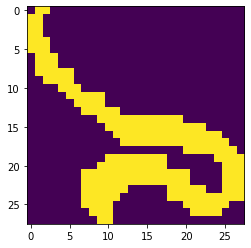

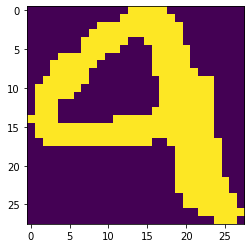

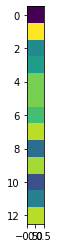

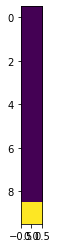

In [ ]:
iterable_dataset = MyIterableDataset(p1)
loader = DataLoader(iterable_dataset,batch_size=1)
for batch_idx,((mnist1, mnist2, speech), label_y) in enumerate(loader):
    print(batch_idx,np.argmax(label_y))
    plt.imshow(mnist1.squeeze())
    _ = plt.show()
    plt.imshow(mnist2.squeeze())
    _ = plt.show()
    plt.imshow(np.expand_dims(speech.squeeze(), axis=-1))
    _ = plt.show()
    plt.imshow(np.expand_dims(label_y.squeeze(), axis=-1))
    _ = plt.show()
    break

In [ ]:
display((p1.mnist_1_X_test.shape, p1.mnist_1_X_train.shape, p1.mnist_1_X_valid.shape, p1.mnist_1_y_test.shape, p1.mnist_1_y_train.shape, p1.mnist_1_y_valid.shape))
display((p2.mnist_1_X_test.shape, p2.mnist_1_X_train.shape, p2.mnist_1_X_valid.shape, p2.mnist_1_y_test.shape, p2.mnist_1_y_train.shape, p2.mnist_1_y_valid.shape))
display((p3.mnist_1_X_test.shape, p3.mnist_1_X_train.shape, p3.mnist_1_X_valid.shape, p3.mnist_1_y_test.shape, p3.mnist_1_y_train.shape, p3.mnist_1_y_valid.shape))
display((p4.mnist_1_X_test.shape, p4.mnist_1_X_train.shape, p4.mnist_1_X_valid.shape, p4.mnist_1_y_test.shape, p4.mnist_1_y_train.shape, p4.mnist_1_y_valid.shape))
display((p5.mnist_1_X_test.shape, p5.mnist_1_X_train.shape, p5.mnist_1_X_valid.shape, p5.mnist_1_y_test.shape, p5.mnist_1_y_train.shape, p5.mnist_1_y_valid.shape))

((1200, 28, 28, 1),
 (3840, 28, 28, 1),
 (960, 28, 28, 1),
 (1200,),
 (3840,),
 (960,))

((1200, 28, 28, 1),
 (3840, 28, 28, 1),
 (960, 28, 28, 1),
 (1200,),
 (3840,),
 (960,))

((600, 28, 28, 1),
 (1920, 28, 28, 1),
 (480, 28, 28, 1),
 (600,),
 (1920,),
 (480,))

((1414, 28, 28, 1),
 (5284, 28, 28, 1),
 (1322, 28, 28, 1),
 (1414,),
 (5284,),
 (1322,))

((600, 28, 28, 1),
 (1920, 28, 28, 1),
 (480, 28, 28, 1),
 (600,),
 (1920,),
 (480,))